In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('https://github.com/anvarnarz/praktikum_datasets/blob/main/E-Commerce-Dataset.csv?raw=true')

df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179


In [22]:
df.drop(columns='CustomerID', inplace=True)

In [23]:
df['is_login_phone'] = df.PreferredLoginDevice.map(lambda x: 1 if x == 'Phone' else 0)
df['is_login_mobile'] = df.PreferredLoginDevice.map(lambda x: 1 if x == 'Mobile Phone' else 0)
df['is_login_computer'] = df.PreferredLoginDevice.map(lambda x: 1 if x == 'Computer' else 0)

df.drop(columns='PreferredLoginDevice', inplace=True)

df.head()

,Churn,Tenure,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,...,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,is_login_phone,is_login_mobile,is_login_computer
0,1,4.0,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,...,9,1,11.0,1.0,1.0,5.0,160,0,1,0
1,1,NaN,1,8.0,UPI,Male,3.0,4,Mobile,3,...,7,1,15.0,0.0,1.0,0.0,121,1,0,0
2,1,NaN,1,30.0,Debit Card,Male,2.0,4,Mobile,3,...,6,1,14.0,0.0,1.0,3.0,120,1,0,0
3,1,0.0,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,...,8,0,23.0,0.0,1.0,3.0,134,1,0,0
4,1,0.0,1,12.0,CC,Male,NaN,3,Mobile,5,...,3,0,11.0,1.0,1.0,3.0,130,1,0,0


In [24]:
payment_mode = pd.get_dummies(df.PreferredPaymentMode, prefix='mode')

df = df.merge(payment_mode, left_index=True, right_index=True)

df.drop(columns='PreferredPaymentMode', inplace=True)

df.head()

,Churn,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,...,is_login_phone,is_login_mobile,is_login_computer,mode_CC,mode_COD,mode_Cash on Delivery,mode_Credit Card,mode_Debit Card,mode_E wallet,mode_UPI
0,1,4.0,3,6.0,Female,3.0,3,Laptop & Accessory,2,Single,...,0,1,0,0,0,0,0,1,0,0
1,1,NaN,1,8.0,Male,3.0,4,Mobile,3,Single,...,1,0,0,0,0,0,0,0,0,1
2,1,NaN,1,30.0,Male,2.0,4,Mobile,3,Single,...,1,0,0,0,0,0,0,1,0,0
3,1,0.0,3,15.0,Male,2.0,4,Laptop & Accessory,5,Single,...,1,0,0,0,0,0,0,1,0,0
4,1,0.0,1,12.0,Male,NaN,3,Mobile,5,Single,...,1,0,0,1,0,0,0,0,0,0


In [25]:
df.dropna(inplace=True)

In [26]:
df['Gender'] = df.Gender.map(lambda x: 1 if x == 'Female' else 0)

df.head()

,Churn,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,...,is_login_phone,is_login_mobile,is_login_computer,mode_CC,mode_COD,mode_Cash on Delivery,mode_Credit Card,mode_Debit Card,mode_E wallet,mode_UPI
0,1,4.0,3,6.0,1,3.0,3,Laptop & Accessory,2,Single,...,0,1,0,0,0,0,0,1,0,0
3,1,0.0,3,15.0,0,2.0,4,Laptop & Accessory,5,Single,...,1,0,0,0,0,0,0,1,0,0
5,1,0.0,1,22.0,1,3.0,5,Mobile Phone,5,Single,...,0,0,1,0,0,0,0,1,0,0
11,1,11.0,1,6.0,0,3.0,4,Fashion,3,Single,...,0,1,0,0,0,0,0,1,0,0
12,1,0.0,1,11.0,0,2.0,3,Mobile,3,Single,...,1,0,0,0,1,0,0,0,0,0


In [28]:
df['is_single'] = df['MaritalStatus'].map(lambda x: 1 if x == 'Single' else 0)

df.drop(columns='MaritalStatus', inplace=True)

df.head()

,Churn,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,NumberOfAddress,...,is_login_mobile,is_login_computer,mode_CC,mode_COD,mode_Cash on Delivery,mode_Credit Card,mode_Debit Card,mode_E wallet,mode_UPI,is_single
0,1,4.0,3,6.0,1,3.0,3,Laptop & Accessory,2,9,...,1,0,0,0,0,0,1,0,0,1
3,1,0.0,3,15.0,0,2.0,4,Laptop & Accessory,5,8,...,0,0,0,0,0,0,1,0,0,1
5,1,0.0,1,22.0,1,3.0,5,Mobile Phone,5,2,...,0,1,0,0,0,0,1,0,0,1
11,1,11.0,1,6.0,0,3.0,4,Fashion,3,10,...,1,0,0,0,0,0,1,0,0,1
12,1,0.0,1,11.0,0,2.0,3,Mobile,3,2,...,0,0,0,1,0,0,0,0,0,1


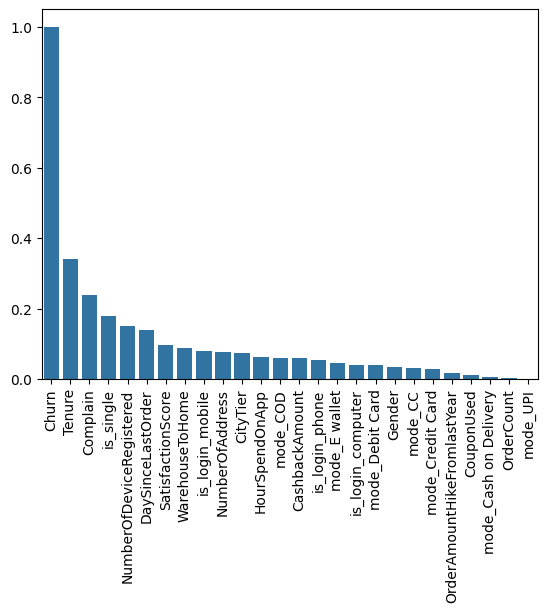

In [ ]:
corr = df.corrwith(df.Churn).abs().sort_values(ascending=False)

sns.barplot(corr)
plt.xticks(rotation=90)
plt.show()

In [60]:
selected_features = corr[corr > 0.07].index.tolist()

selected_features

['Churn',
 'Tenure',
 'Complain',
 'is_single',
 'NumberOfDeviceRegistered',
 'DaySinceLastOrder',
 'SatisfactionScore',
 'WarehouseToHome',
 'is_login_mobile',
 'NumberOfAddress',
 'CityTier']

In [61]:
data = df[selected_features]

data

,Churn,Tenure,Complain,is_single,NumberOfDeviceRegistered,DaySinceLastOrder,SatisfactionScore,WarehouseToHome,is_login_mobile,NumberOfAddress,CityTier
0,1,4.0,1,1,3,5.0,2,6.0,1,9,3
3,1,0.0,0,1,4,3.0,5,15.0,0,8,3
5,1,0.0,1,1,5,7.0,5,22.0,0,2,1
11,1,11.0,1,1,4,0.0,3,6.0,1,10,1
12,1,0.0,1,1,3,2.0,3,11.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5624,0,1.0,0,1,5,1.0,3,12.0,1,2,3
5625,0,10.0,0,0,2,4.0,1,30.0,0,6,1
5627,0,1.0,1,0,2,4.0,4,11.0,1,3,1
5628,0,23.0,0,0,5,9.0,4,9.0,0,4,3


In [62]:
X, y = data.drop(columns='Churn'), data['Churn']

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [68]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# LogisticRegression

In [65]:
from sklearn.linear_model import LogisticRegression

lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

LogisticRegression()

Score of LogisticRegression model:  0.8622516556291391
Classification report:                precision    recall  f1-score   support

           0       0.88      0.97      0.92       629
           1       0.67      0.34      0.45       126

    accuracy                           0.86       755
   macro avg       0.78      0.65      0.69       755
weighted avg       0.85      0.86      0.84       755



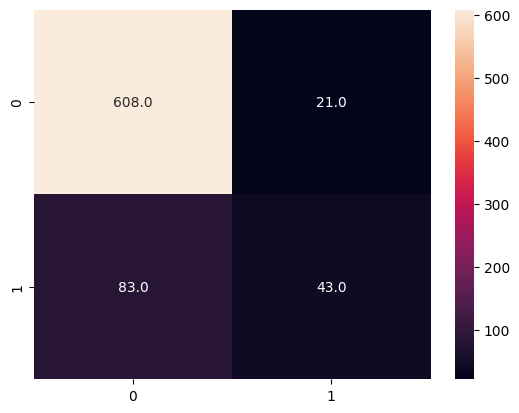

In [78]:
print('Score of LogisticRegression model: ', lg_model.score(X_test, y_test))

y_test_predicted = lg_model.predict(X_test)

print('Classification report: ', classification_report(y_test, y_test_predicted))

confusion = confusion_matrix(y_test, y_test_predicted)

sns.heatmap(confusion, annot=True, fmt='.1f')
plt.show()

# KNN

In [79]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

Score of KNN model:  0.9059602649006623
KNN report:                precision    recall  f1-score   support

           0       0.93      0.97      0.94       629
           1       0.78      0.61      0.68       126

    accuracy                           0.91       755
   macro avg       0.85      0.79      0.81       755
weighted avg       0.90      0.91      0.90       755



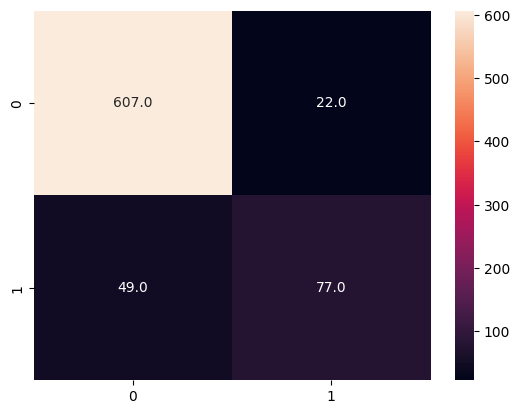

In [80]:
print('Score of KNN model: ', knn_clf.score(X_test, y_test))

y_test_predicted = knn_clf.predict(X_test)

print('KNN report: ', classification_report(y_test, y_test_predicted))

confusion = confusion_matrix(y_test, y_test_predicted)

sns.heatmap(confusion, annot=True, fmt='.1f')
plt.show()

# DecisionTree

In [81]:
from sklearn.tree import plot_tree, DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

Score of DecisionTree model:  0.9589403973509933
DecisionTree report:                precision    recall  f1-score   support

           0       0.99      0.97      0.98       629
           1       0.84      0.93      0.88       126

    accuracy                           0.96       755
   macro avg       0.91      0.95      0.93       755
weighted avg       0.96      0.96      0.96       755



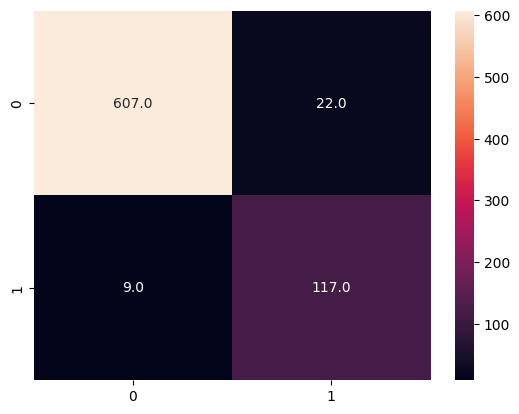

In [82]:
print('Score of DecisionTree model: ', tree_clf.score(X_test, y_test))

y_test_predicted = tree_clf.predict(X_test)

print('DecisionTree report: ', classification_report(y_test, y_test_predicted))

confusion = confusion_matrix(y_test, y_test_predicted)

sns.heatmap(confusion, annot=True, fmt='.1f')
plt.show()

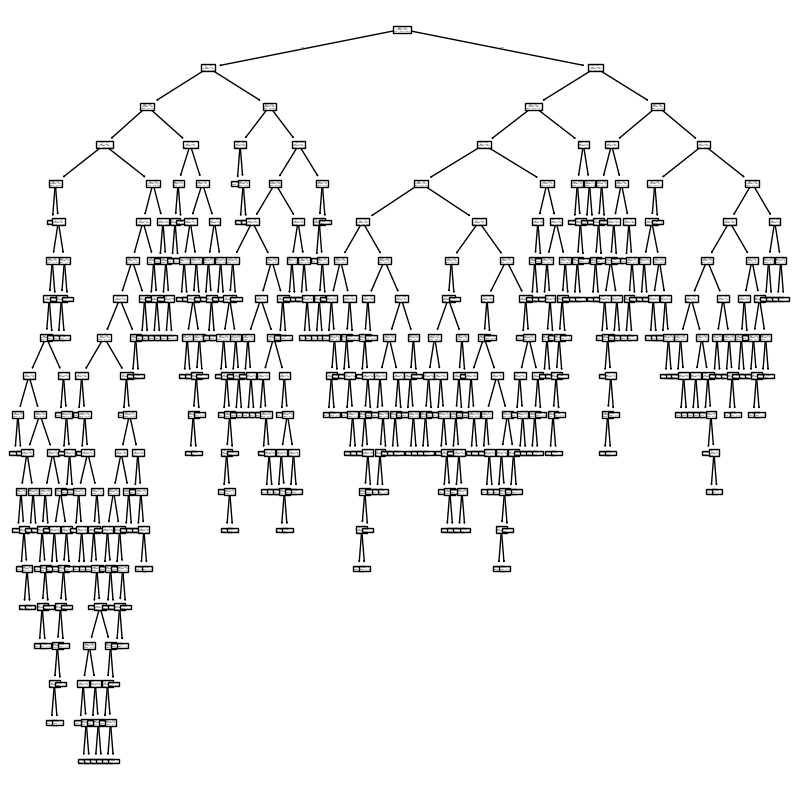

In [83]:
plt.figure(figsize=(10, 10))

plot_tree(tree_clf)

plt.show()

# RandomForest

In [84]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

Score of RandomForestClassifier model:  0.976158940397351
RandomForestClassifier report:                precision    recall  f1-score   support

           0       0.98      1.00      0.99       629
           1       0.97      0.88      0.93       126

    accuracy                           0.98       755
   macro avg       0.98      0.94      0.96       755
weighted avg       0.98      0.98      0.98       755



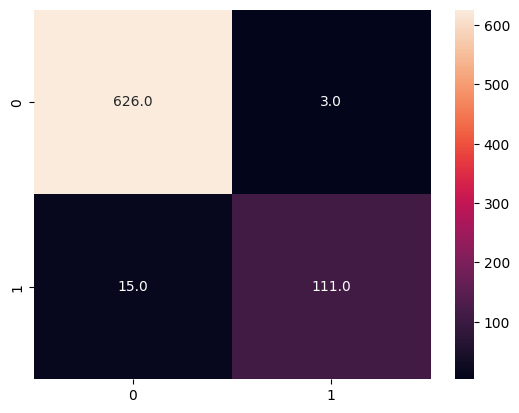

In [85]:
print('Score of RandomForestClassifier model: ', forest.score(X_test, y_test))

y_test_predicted = forest.predict(X_test)

print('RandomForestClassifier report: ', classification_report(y_test, y_test_predicted))

confusion = confusion_matrix(y_test, y_test_predicted)

sns.heatmap(confusion, annot=True, fmt='.1f')
plt.show()

# SVC

In [86]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

Score of SVC model:  0.866225165562914
SVC report:                precision    recall  f1-score   support

           0       0.88      0.98      0.92       629
           1       0.73      0.32      0.44       126

    accuracy                           0.87       755
   macro avg       0.80      0.65      0.68       755
weighted avg       0.85      0.87      0.84       755



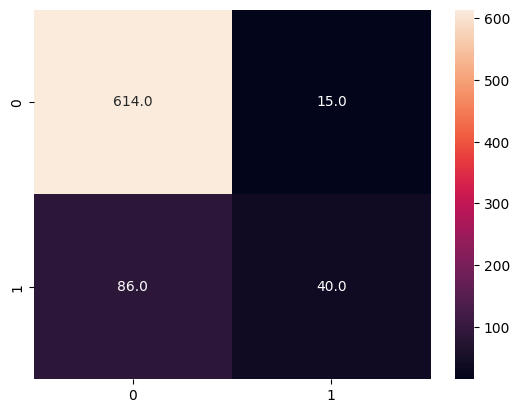

In [87]:
print('Score of SVC model: ', svc_model.score(X_test, y_test))

y_test_predicted = svc_model.predict(X_test)

print('SVC report: ', classification_report(y_test, y_test_predicted))

confusion = confusion_matrix(y_test, y_test_predicted)

sns.heatmap(confusion, annot=True, fmt='.1f')
plt.show()